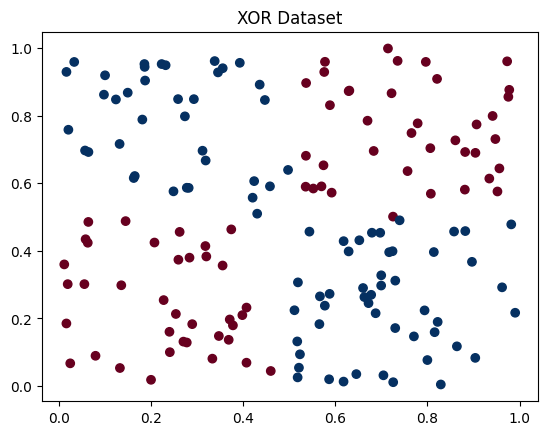

In [8]:
import numpy as np
import tensorflow as tf
from sklearn.preprocessing import PolynomialFeatures
from sklearn.metrics import accuracy_score
from sklearn.linear_model import LogisticRegression
import matplotlib.pyplot as plt

# Generating XOR dataset
np.random.seed(0)
X_train = np.random.rand(200, 2)
y_train = np.logical_xor(X_train[:, 0] > 0.5, X_train[:, 1] > 0.5).astype(int)

# Splitting X_train and y_train into training and validation sets
val_size = int(0.2 * len(X_train))  # 20% for validation
X_val = X_train[:val_size]
y_val = y_train[:val_size]
X_train = X_train[val_size:]
y_train = y_train[val_size:]

X_test = np.random.rand(200, 2)
y_test = np.logical_xor(X_test[:, 0] > 0.5, X_test[:, 1] > 0.5).astype(int)
#print(X_train)
#print(y_train)

# Visualize the dataset
plt.scatter(X_train[:, 0], X_train[:, 1], c=y_train, cmap='RdBu')
plt.title('XOR Dataset')
plt.show()

Epoch 1/200
5/5 [==============================] - 2s 149ms/step - loss: 0.6985 - accuracy: 0.4688 - val_loss: 0.6892 - val_accuracy: 0.5000
Epoch 2/200
5/5 [==============================] - 0s 49ms/step - loss: 0.6927 - accuracy: 0.4500 - val_loss: 0.6845 - val_accuracy: 0.5500
Epoch 3/200
5/5 [==============================] - 0s 36ms/step - loss: 0.6876 - accuracy: 0.4375 - val_loss: 0.6803 - val_accuracy: 0.5500
Epoch 4/200
5/5 [==============================] - 0s 33ms/step - loss: 0.6825 - accuracy: 0.5250 - val_loss: 0.6766 - val_accuracy: 0.6250
Epoch 5/200
5/5 [==============================] - 0s 34ms/step - loss: 0.6784 - accuracy: 0.5250 - val_loss: 0.6732 - val_accuracy: 0.6250
Epoch 6/200
5/5 [==============================] - 0s 31ms/step - loss: 0.6743 - accuracy: 0.6062 - val_loss: 0.6700 - val_accuracy: 0.6000
Epoch 7/200
5/5 [==============================] - 0s 29ms/step - loss: 0.6701 - accuracy: 0.6562 - val_loss: 0.6670 - val_accuracy: 0.6250
Epoch 8/200
5/5 [==

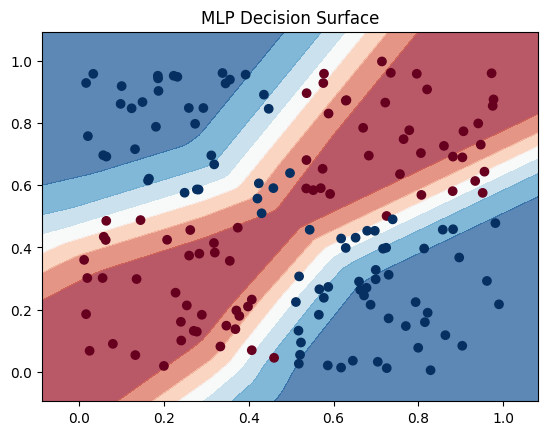

7/7 [==============================] - 0s 2ms/step - loss: 0.2873 - accuracy: 0.8650
Test Accuracy: 0.8650000095367432


In [9]:
# MLP
model = tf.keras.Sequential([tf.keras.layers.Dense(16, activation='relu', input_shape=(2,)), tf.keras.layers.Dense(16, activation='relu'), tf.keras.layers.Dense(1, activation='sigmoid')])
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])
model.fit(X_train, y_train, epochs=200, batch_size=32, validation_data=(X_val, y_val))

# Decision surface for MLP
x_min, x_max = X_train[:,0].min() -0.1, X_train[:, 0].max() +  0.1
y_min, y_max = X_train[:,1].min() - 0.1, X_train[:, 1].max()+ 0.1
xx, yy = np.meshgrid(np.arange(x_min, x_max, 0.01), np.arange(y_min, y_max, 0.01))
Z = model.predict(np.c_[xx.ravel(), yy.ravel()])
Z = Z.reshape(xx.shape)
plt.contourf(xx, yy, Z, cmap='RdBu', alpha=0.7)
plt.scatter(X_train[:,0], X_train[:, 1], c=y_train, cmap='RdBu')
plt.title('MLP Decision Surface')
plt.show()

test_loss, test_accuracy = model.evaluate(X_test, y_test)
print("Test Accuracy:", test_accuracy)

Epoch 1/200
5/5 [==============================] - 1s 52ms/step - loss: 0.7497 - accuracy: 0.5312 - val_loss: 0.7482 - val_accuracy: 0.5000
Epoch 2/200
5/5 [==============================] - 0s 13ms/step - loss: 0.7475 - accuracy: 0.5312 - val_loss: 0.7463 - val_accuracy: 0.5000
Epoch 3/200
5/5 [==============================] - 0s 13ms/step - loss: 0.7452 - accuracy: 0.5312 - val_loss: 0.7444 - val_accuracy: 0.5000
Epoch 4/200
5/5 [==============================] - 0s 9ms/step - loss: 0.7433 - accuracy: 0.5312 - val_loss: 0.7425 - val_accuracy: 0.5000
Epoch 5/200
5/5 [==============================] - 0s 14ms/step - loss: 0.7413 - accuracy: 0.5312 - val_loss: 0.7408 - val_accuracy: 0.5000
Epoch 6/200
5/5 [==============================] - 0s 13ms/step - loss: 0.7397 - accuracy: 0.5312 - val_loss: 0.7390 - val_accuracy: 0.5000
Epoch 7/200
5/5 [==============================] - 0s 14ms/step - loss: 0.7378 - accuracy: 0.5312 - val_loss: 0.7373 - val_accuracy: 0.5000
Epoch 8/200
5/5 [====

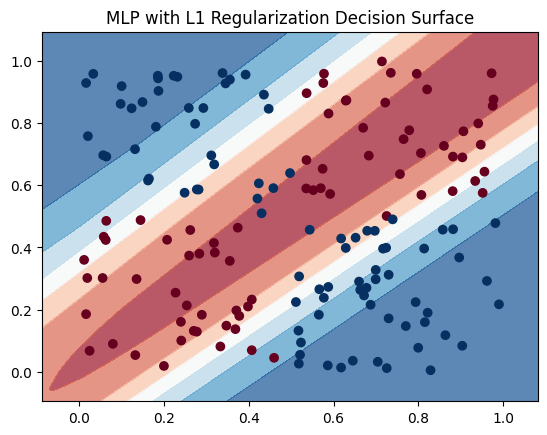

7/7 [==============================] - 0s 2ms/step - loss: 0.4349 - accuracy: 0.8450
Test Accuracy: 0.8450000286102295


In [10]:
# MLP with L1 regularization
model1 = tf.keras.Sequential([
    tf.keras.layers.Dense(16, activation='relu', kernel_regularizer=tf.keras.regularizers.l1(0.001), input_shape=(2,)),
    tf.keras.layers.Dense(16, activation='relu', kernel_regularizer=tf.keras.regularizers.l1(0.001)),
    tf.keras.layers.Dense(1, activation='sigmoid')
])
model1.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])
model1.fit(X_train, y_train, epochs=200, batch_size=32, validation_data=(X_val, y_val))

# Decision surface for MLP with L1 regulasization
x_min, x_max = X_train[:,0].min() - 0.1, X_train[:, 0].max() + 0.1
y_min, y_max = X_train[:, 1].min() - 0.1, X_train[:,1].max() +0.1
xx, yy = np.meshgrid(np.arange(x_min, x_max, 0.01), np.arange(y_min, y_max, 0.01))
Z = model1.predict(np.c_[xx.ravel(), yy.ravel()])
Z = Z.reshape(xx.shape)
plt.contourf(xx, yy, Z, cmap='RdBu', alpha=0.7)
plt.scatter(X_train[:,0], X_train[:,1], c=y_train, cmap='RdBu')
plt.title('MLP with L1 Regularization Decision Surface')
plt.show()

test_loss, test_accuracy = model1.evaluate(X_test, y_test)
print("Test Accuracy:", test_accuracy)

Epoch 1/200
5/5 [==============================] - 1s 78ms/step - loss: 0.7180 - accuracy: 0.5437 - val_loss: 0.7173 - val_accuracy: 0.6250
Epoch 2/200
5/5 [==============================] - 0s 13ms/step - loss: 0.7149 - accuracy: 0.5875 - val_loss: 0.7148 - val_accuracy: 0.4500
Epoch 3/200
5/5 [==============================] - 0s 13ms/step - loss: 0.7116 - accuracy: 0.3375 - val_loss: 0.7114 - val_accuracy: 0.3250
Epoch 4/200
5/5 [==============================] - 0s 13ms/step - loss: 0.7086 - accuracy: 0.4313 - val_loss: 0.7085 - val_accuracy: 0.3750
Epoch 5/200
5/5 [==============================] - 0s 14ms/step - loss: 0.7061 - accuracy: 0.4688 - val_loss: 0.7066 - val_accuracy: 0.4750
Epoch 6/200
5/5 [==============================] - 0s 13ms/step - loss: 0.7043 - accuracy: 0.5250 - val_loss: 0.7049 - val_accuracy: 0.5000
Epoch 7/200
5/5 [==============================] - 0s 13ms/step - loss: 0.7030 - accuracy: 0.5312 - val_loss: 0.7036 - val_accuracy: 0.5000
Epoch 8/200
5/5 [===

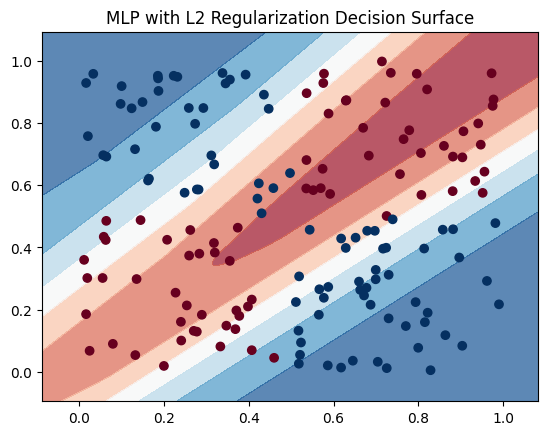

7/7 [==============================] - 0s 2ms/step - loss: 0.4379 - accuracy: 0.8300
Test Accuracy: 0.8299999833106995


In [11]:
# MLP with l2 regularization
model2 = tf.keras.Sequential([tf.keras.layers.Dense(16, activation='relu', kernel_regularizer=tf.keras.regularizers.l2(0.001), input_shape=(2,)),
                             tf.keras.layers.Dense(16, activation='relu', kernel_regularizer=tf.keras.regularizers.l2(0.001)),
                             tf.keras.layers.Dense(1, activation='sigmoid')])
model2.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])
model2.fit(X_train, y_train, epochs=200, batch_size=32, validation_data=(X_val, y_val))

#  Decision surface for MLP with L2 regularization
x_min, x_max = X_train[:,0].min() - 0.1, X_train[:, 0].max()+ 0.1
y_min, y_max = X_train[:,1].min() - 0.1, X_train[:, 1].max() + 0.1
xx, yy = np.meshgrid(np.arange(x_min, x_max, 0.01),np.arange(y_min, y_max, 0.01))
Z = model2.predict(np.c_[xx.ravel(), yy.ravel()])
Z = Z.reshape(xx.shape)
plt.contourf(xx, yy, Z, cmap='RdBu', alpha=0.7)
plt.scatter(X_train[:, 0], X_train[:, 1], c=y_train, cmap='RdBu')
plt.title('MLP with L2 Regularization Decision Surface')
plt.show()

test_loss, test_accuracy = model2.evaluate(X_test, y_test)
print("Test Accuracy:", test_accuracy)

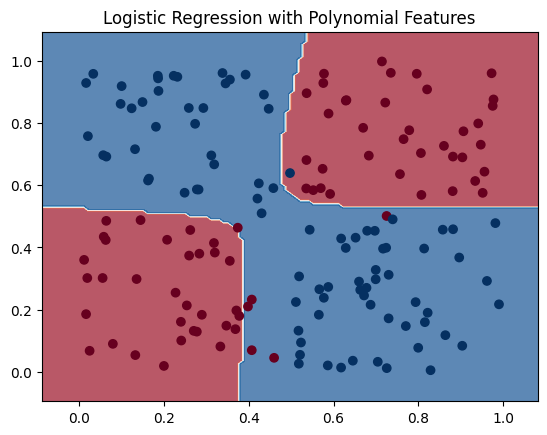

Test Accuracy: 0.895


In [14]:
from sklearn.metrics import accuracy_score
# Logistic regression with polynomial features
poly = PolynomialFeatures(degree=4)
X_train_poly = poly.fit_transform(X_train)
X_test_poly = poly.transform(X_test)
model3 = LogisticRegression()
model3.fit(X_train_poly, y_train)

# decision surface for logistci regression with polynomial features
x_min, x_max = X_train[:,0].min() - 0.1, X_train[:, 0].max() + 0.1
y_min, y_max = X_train[:, 1].min()-0.1, X_train[:,1].max() + 0.1
xx, yy = np.meshgrid(np.arange(x_min, x_max, 0.01), np.arange(y_min, y_max, 0.01))
Z = model3.predict(poly.transform(np.c_[xx.ravel(), yy.ravel()]))
Z = Z.reshape(xx.shape)
plt.contourf(xx, yy, Z, cmap='RdBu', alpha=0.7)
plt.scatter(X_train[:, 0], X_train[:, 1], c=y_train, cmap='RdBu')
plt.title('Logistic Regression with Polynomial Features')
plt.show()

y_pred_test = model3.predict(X_test_poly)
test_accuracy = accuracy_score(y_test, y_pred_test)
print("Test Accuracy:", test_accuracy)

Obervation:

(1) The MLP is able to capture the non-linear decision boundary reasonably well, as shown by the curved decision boundary separating the blue and red regions. However, there are some areas where the decision boundary appears slightly irregular. We got accuracy of 86.5 %.

(2)  MLP with L1 regularization adds a penalty term to the loss function, which encourages sparsity in the model weights and making unecessary model weights zero. The decision boundary appears to be not overfitting the training data and more regularized compared to the unregularized MLP. We got the accracy of 84.5 %.

(3)  MLP with L2 regularization adds a penalty term to the loss function that shrinks the model weights towards zero (not exactly zero). The decision boundary appears smoother and more regularized compared to the unregularized MLP. We got the accuracy of 83%

(4)  The logistic regression model with polynomial features is able to capture the non-linear decision boundary of the XOR function quite well, with a clear separation between the blue and red regions.  We got the accuracy of 89.5%